![image](https://analyticsindiamag.com/wp-content/uploads/2020/04/Screenshot-2020-04-15-at-10.08.12-AM.png)

## Business Problem Understanding

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

- Each row in the data provides relavant information about the patient.

## Attribute Information
- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



## Data Collection/Data Import

**The dataset is available at this google drive link:**
**Use gdown to download this in the colab environment directly.**

!gdown https://drive.google.com/uc?id=1vs0cmeKYeht_d07C1HvHFUIxD-IfEACL


In [66]:
## write your code here
!gdown https://drive.google.com/uc?id=1vs0cmeKYeht_d07C1HvHFUIxD-IfEACL

Downloading...
From: https://drive.google.com/uc?id=1vs0cmeKYeht_d07C1HvHFUIxD-IfEACL
To: /content/stroke_data.csv
100% 484k/484k [00:00<00:00, 40.8MB/s]


## Importing Necessary libraries

In [67]:
import os
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data From CSV File Using Pandas

In [68]:
## write your code here
df = pd.read_csv('/content/stroke_data.csv')

## Data Understanding:

### Print the first five rows of the pandas dataframe

In [69]:
## write your code here
df.head()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1


## Print the last five rows of the pandas dataframe

In [70]:
## write your code here
df.tail()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
5130,46373,Female,57.0,1.67640,72.506178,169.97,25.8,never smoked,0,0,Yes,Private,Rural,0
5131,40112,Female,37.0,1.92024,92.551774,118.41,25.1,never smoked,0,0,No,Private,Urban,0
5132,32240,Female,27.0,1.82880,139.131593,93.55,41.6,never smoked,0,0,No,Private,Urban,0
5133,69312,Female,48.0,1.58496,78.377464,99.29,31.2,never smoked,0,0,Yes,Self-employed,Urban,0
5134,25763,Female,23.0,1.64592,76.666190,98.66,28.3,Unknown,0,0,No,Private,Urban,0


## What is the shape of the dataset?

In [71]:
## write your code here
df.shape

(5135, 14)

## What are the name of the columns in the dataframe?

In [72]:
## write your code here
df.columns

Index(['id', 'gender', 'age', 'height_in_m', 'weight_in_kg',
       'avg_glucose_level', 'bmi', 'smoking_status', 'hypertension',
       'heart_disease', 'ever_married', 'work_type', 'Residence_type',
       'stroke'],
      dtype='object')

### What are the datatypes of each feature in the dataset?

In [73]:
## write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5135 entries, 0 to 5134
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5135 non-null   int64  
 1   gender             5135 non-null   object 
 2   age                5135 non-null   float64
 3   height_in_m        5135 non-null   float64
 4   weight_in_kg       4934 non-null   float64
 5   avg_glucose_level  5135 non-null   float64
 6   bmi                4934 non-null   float64
 7   smoking_status     5135 non-null   object 
 8   hypertension       5135 non-null   int64  
 9   heart_disease      5135 non-null   int64  
 10  ever_married       4933 non-null   object 
 11  work_type          5135 non-null   object 
 12  Residence_type     5135 non-null   object 
 13  stroke             5135 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 561.8+ KB


## Descriptive Statistics

Descriptive statistics involve a set of summary measures that provide a snapshot of the dataset's characteristics. These measures help us understand the distribution, central tendency, and variability within the data.

- Mean: The average value of the data.
- Median: The middle value when the data is sorted.
- Mode: The most frequently occurring value.
- Range: The difference between the maximum and minimum values.
- Standard Deviation: A more interpretable measure of data spread.
These statistics provide a preliminary understanding of the dataset, which is valuable for subsequent analysis and decision-making.



### How to see the descriptive statistics of a dataset?

In [74]:
## write your code here?


## How to select gender column from the pandas dataframe?

In [75]:
## write your code here
df['gender']

0         Male
1       Female
2         Male
3       Female
4       female
         ...  
5130    Female
5131    Female
5132    Female
5133    Female
5134    Female
Name: gender, Length: 5135, dtype: object

### How to select multiple columns : age, gender and bmi?

In [76]:
## write your code here
df[['age', 'gender', 'bmi']]


,age,gender,bmi
0,67.0,Male,36.6
1,61.0,Female,NaN
2,80.0,Male,32.5
3,49.0,Female,34.4
4,79.0,female,24.0
...,...,...,...
5130,57.0,Female,25.8
5131,37.0,Female,25.1
5132,27.0,Female,41.6
5133,48.0,Female,31.2


## How to select the 7th row of the pandas dataframe?


In [77]:
## write your code here
df.iloc[7,:]

id                          10434
gender                     Female
age                          69.0
height_in_m               1.61544
weight_in_kg            59.499938
avg_glucose_level           94.39
bmi                          22.8
smoking_status       never smoked
hypertension                    0
heart_disease                   0
ever_married                   No
work_type                 Private
Residence_type              Urban
stroke                          1
Name: 7, dtype: object

## How to select the 4th column from the pandas dataframe?


In [78]:
## write your code here
df.iloc[:,4]

0       122.409046
1              NaN
2       105.103532
3       126.843865
4        82.966131
           ...    
5130     72.506178
5131     92.551774
5132    139.131593
5133     78.377464
5134     76.666190
Name: weight_in_kg, Length: 5135, dtype: float64

## How to select 20th to 30th row and 3rd to 7th column in pandas dataframe?

In [79]:
## write your code here
df.iloc[20:30, 3:7]

,height_in_m,weight_in_kg,avg_glucose_level,bmi
20,1.85928,77.435055,169.35,22.4
21,1.95072,186.079587,169.35,48.9
22,1.55448,64.276455,169.35,26.6
23,1.55448,78.533262,169.35,32.5
24,1.92024,100.295149,102.87,27.2
25,1.95072,89.424750,104.12,23.5
26,1.88976,100.707639,100.98,28.2
27,1.64592,NaN,169.35,NaN
28,1.88976,101.064758,169.35,28.3
29,1.61544,NaN,169.35,NaN


## How to select 3rd and 100th row & 4th and 10th column in a pandas dataframe?

In [80]:
## write your code here
df.iloc[[3, 100], [4, 10]]

,weight_in_kg,ever_married
3,126.843865,Yes
100,86.930489,Yes


## Select only those rows with gender 'Male'

In [81]:
## write your code here
df[df['gender'] == "Male"]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
5,56669,Male,81.0,1.79832,93.784690,169.35,29.0,formerly smoked,0,0,Yes,Private,Urban,1
6,53882,Male,74.0,1.88976,97.850684,70.09,27.4,never smoked,1,1,Yes,Private,Rural,1
13,8213,Male,78.0,1.52400,NaN,169.35,NaN,Unknown,0,1,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,26242,Male,6.0,1.55448,48.328161,83.28,20.0,Unknown,0,0,NaN,children,Urban,0
5121,20973,Male,45.0,1.73736,114.398109,86.99,37.9,never smoked,0,0,Yes,Govt_job,Rural,0
5122,62793,Male,37.0,1.95072,95.893775,79.56,25.2,never smoked,0,0,Yes,Private,Urban,0
5125,64520,Male,68.0,1.61544,106.473573,91.68,40.8,Unknown,0,0,Yes,Self-employed,Urban,0


## Select all those rows which have avg_glucose_level greater than 100 and columns gender, age, bmi and avg_glucose_level

In [82]:
## write your code here
df.loc[df['avg_glucose_level'] > 100, ['gender', 'age', 'bmi', 'avg_glucose_level']]

,gender,age,bmi,avg_glucose_level
0,Male,67.0,36.6,169.35
1,Female,61.0,NaN,169.35
2,Male,80.0,32.5,105.92
3,Female,49.0,34.4,169.35
4,female,79.0,24.0,169.35
...,...,...,...,...
5110,Female,39.0,26.6,102.51
5123,Female,18.0,23.2,112.33
5126,Female,36.0,23.2,100.33
5130,Female,57.0,25.8,169.97


## Select all those Females who are greater than 50 years old?

In [83]:
## write your code here
df.loc[(df['gender']== "Female") &
       (df['age'] > 50)]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
7,10434,Female,69.0,1.61544,59.499938,94.39,22.8,never smoked,0,0,No,Private,Urban,1
8,27419,Female,59.0,1.85928,NaN,76.15,NaN,Unknown,0,0,Yes,Private,Rural,1
9,60491,Female,78.0,1.98120,94.988713,58.57,24.2,Unknown,0,0,Yes,Private,Urban,1
10,12109,Female,81.0,1.95072,113.017663,80.43,29.7,never smoked,1,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,44873,Female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5115,9160,Female,80.0,1.73736,78.478914,90.77,26.0,never smoked,1,0,Yes,Private,Urban,0
5124,27705,Female,82.0,1.79832,105.103532,88.60,32.5,Unknown,0,1,Yes,Self-employed,Rural,0
5127,23989,Female,62.0,1.73736,98.400484,86.40,32.6,smokes,0,0,Yes,Self-employed,Urban,0


## Data Wrangling

- Data Inspection
  - Checking Duplicate Enties
  - Checking Missing Values
  - Checking standard format
  - Checking data entry typos and errors
- Data Cleaning
  - Removing Duplicates
  - Handling Missing Values
  - Standardizing Formats
  - Correcting Errors
- Data Transformation
  - Feature Engineering
  - Normalization/Scaling
  - One-Hot Encoding
- Data Integration
- Data Reduction
- Data Formatting
- Data Enrichment
- Data Validation
- Documentation
- Exploratory Data Analysis (EDA)


### Checking Duplicate Entries
- Check if duplicate entries are present or not.
- If present find how many of duplicate entries are there?

In [84]:
## write your code here
df[df.duplicated()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
5110,26605,Female,39.0,1.61544,69.416594,102.51,26.6,smokes,0,0,Yes,Private,Rural,0
5111,5236,Female,49.0,1.73736,99.607852,73.48,33.0,never smoked,0,0,Yes,Private,Rural,0
5112,11709,Male,71.0,1.55448,76.116854,95.08,31.5,never smoked,0,0,No,Private,Urban,0
5113,53695,Male,70.0,1.95072,103.504392,81.59,27.2,never smoked,0,0,Yes,Govt_job,Urban,0
5114,68596,Female,19.0,1.85928,97.485204,58.39,28.2,never smoked,0,0,No,Private,Urban,0
5115,9160,Female,80.0,1.73736,78.478914,90.77,26.0,never smoked,1,0,Yes,Private,Urban,0
5116,26474,Female,44.0,1.67640,93.021491,97.16,33.1,Unknown,0,0,Yes,Govt_job,Urban,0
5117,23633,Female,37.0,1.82880,140.803847,83.65,42.1,smokes,0,0,Yes,Private,Rural,0
5118,53998,Female,21.0,1.64592,84.793348,58.66,31.3,never smoked,0,0,No,Private,Urban,0
5119,26242,Male,6.0,1.55448,48.328161,83.28,20.0,Unknown,0,0,NaN,children,Urban,0


In [85]:
## write your code here
df[df.duplicated()].shape

(25, 14)

## Remove Duplicate Entries

- Remove all those rows which has duplicate entries

In [86]:
## write your code here
clean_df = df[~df.duplicated()]

In [87]:
clean_df[clean_df.duplicated()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke


## Checking Missing Values
- Find missing values (NAN) values in the datasets
- Find columns which has missing values with their frequency

In [88]:
## write your code here
clean_df.isnull().sum()

id                     0
gender                 0
age                    0
height_in_m            0
weight_in_kg         201
avg_glucose_level      0
bmi                  201
smoking_status         0
hypertension           0
heart_disease          0
ever_married         201
work_type              0
Residence_type         0
stroke                 0
dtype: int64

## Visualize missing values using heatmaps

<Axes: >

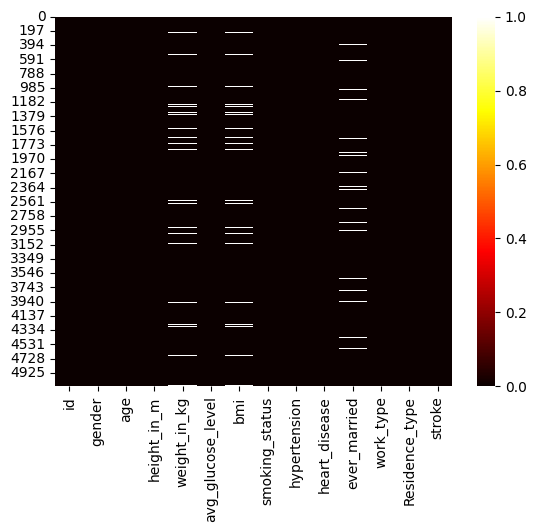

In [89]:
sns.heatmap(clean_df.isnull(), cmap = "hot")

## Handling Missing Values

- Handle missing values for ever_married column, avg_glucose_level and weight_in_kg column

In [90]:
## write your code here
clean_df['ever_married'].value_counts()

ever_married
Yes    3408
No     1501
Name: count, dtype: int64

In [91]:
## write your code here

clean_df.loc[clean_df['ever_married'].isnull()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
249,30669,Male,3.0,1.64592,48.762948,95.12,18.0,Unknown,0,0,NaN,children,Rural,0
282,33759,Female,3.0,1.55448,38.662529,73.74,16.0,Unknown,0,0,NaN,children,Urban,0
291,11014,Male,4.0,1.85928,69.138442,79.17,20.0,Unknown,0,0,NaN,children,Rural,0
369,8171,Female,4.0,1.76784,51.879287,93.25,16.6,Unknown,0,0,NaN,children,Rural,0
380,31741,Male,4.0,1.95072,63.548652,106.22,16.7,Unknown,0,0,NaN,children,Rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,21743,Male,4.0,1.85928,61.187521,85.88,17.7,Unknown,0,0,NaN,children,Urban,0
5020,6278,Male,5.0,1.58496,44.212928,97.46,17.6,Unknown,0,0,NaN,children,Urban,0
5050,15581,Male,5.0,1.95072,73.442454,101.87,19.3,Unknown,0,0,NaN,children,Urban,0
5052,31836,Female,6.0,1.98120,86.745891,91.05,22.1,Unknown,0,0,NaN,children,Urban,0


In [92]:
## write your code here

clean_df.loc[(clean_df['ever_married'].isnull())
& (clean_df['age'] < 18)]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
249,30669,Male,3.0,1.64592,48.762948,95.12,18.0,Unknown,0,0,NaN,children,Rural,0
282,33759,Female,3.0,1.55448,38.662529,73.74,16.0,Unknown,0,0,NaN,children,Urban,0
291,11014,Male,4.0,1.85928,69.138442,79.17,20.0,Unknown,0,0,NaN,children,Rural,0
369,8171,Female,4.0,1.76784,51.879287,93.25,16.6,Unknown,0,0,NaN,children,Rural,0
380,31741,Male,4.0,1.95072,63.548652,106.22,16.7,Unknown,0,0,NaN,children,Rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,21743,Male,4.0,1.85928,61.187521,85.88,17.7,Unknown,0,0,NaN,children,Urban,0
5020,6278,Male,5.0,1.58496,44.212928,97.46,17.6,Unknown,0,0,NaN,children,Urban,0
5050,15581,Male,5.0,1.95072,73.442454,101.87,19.3,Unknown,0,0,NaN,children,Urban,0
5052,31836,Female,6.0,1.98120,86.745891,91.05,22.1,Unknown,0,0,NaN,children,Urban,0


In [93]:
## write your code here

clean_df.loc[(clean_df['ever_married'].isnull())
& (clean_df['age'] < 18), 'ever_married'] = "No"

In [94]:
clean_df[clean_df['weight_in_kg'].isnull()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
8,27419,Female,59.0,1.85928,NaN,76.15,NaN,Unknown,0,0,Yes,Private,Rural,1
13,8213,Male,78.0,1.52400,NaN,169.35,NaN,Unknown,0,1,Yes,Private,Urban,1
19,25226,Male,57.0,1.85928,NaN,169.35,NaN,Unknown,0,1,No,Govt_job,Urban,1
27,61843,Male,58.0,1.64592,NaN,169.35,NaN,Unknown,0,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,1.70688,NaN,70.15,NaN,formerly smoked,0,0,No,Private,Rural,0
5048,28788,Male,40.0,1.73736,NaN,169.35,NaN,smokes,0,0,Yes,Private,Urban,0
5093,32235,Female,45.0,1.58496,NaN,95.02,NaN,smokes,1,0,Yes,Govt_job,Rural,0
5099,7293,Male,40.0,1.73736,NaN,83.94,NaN,smokes,0,0,Yes,Private,Rural,0


In [95]:
clean_df.isnull().sum()

id                     0
gender                 0
age                    0
height_in_m            0
weight_in_kg         201
avg_glucose_level      0
bmi                  201
smoking_status         0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
stroke                 0
dtype: int64

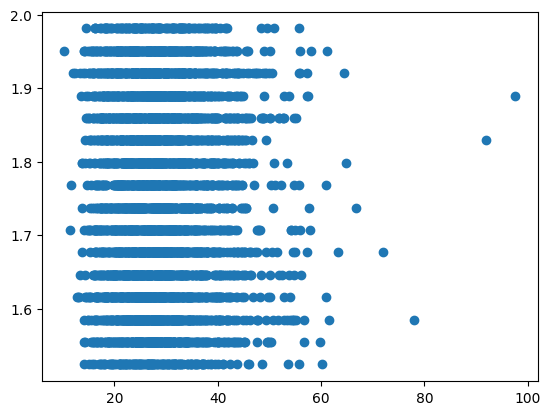

In [96]:
plt.scatter(clean_df['bmi'], clean_df['height_in_m'])

In [97]:
## Drop those rows where weight_in_kg and bmi is not given

In [98]:
final_df = clean_df.loc[~clean_df['weight_in_kg'].isnull()]
final_df.shape

(4909, 14)

In [99]:
final_df.isnull().sum()

id                   0
gender               0
age                  0
height_in_m          0
weight_in_kg         0
avg_glucose_level    0
bmi                  0
smoking_status       0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
stroke               0
dtype: int64

## Exploratory Data Analysis

- Univariate Analysis: Studying one variable at a time
- Bivariate Analysis: Studying two variables at a time
- Multivariate Analysis: Studying multiple variables at a time
- We need to investigate each feature properly

In [100]:
df.columns

Index(['id', 'gender', 'age', 'height_in_m', 'weight_in_kg',
       'avg_glucose_level', 'bmi', 'smoking_status', 'hypertension',
       'heart_disease', 'ever_married', 'work_type', 'Residence_type',
       'stroke'],
      dtype='object')

## id feature

In [101]:
## write your code here
final_df['id'].nunique()

4909

In [102]:
final_df.shape

(4909, 14)

## gender

In [103]:
final_df['gender'].dtypes

dtype('O')

In [104]:
final_df['gender'].value_counts()

gender
Female    2850
Male      1966
female      47
male        45
Other        1
Name: count, dtype: int64

In [105]:
final_df['gender'].replace({"female": "Female",
                  "male": "Male"}, inplace = True)

<ipython-input-105-f40030bec9c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['gender'].replace({"female": "Female",


In [107]:
final_df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [108]:
final_df = final_df.loc[final_df['gender']!= 'Other']

In [115]:
gender_df = final_df['gender'].value_counts().reset_index()
gender_df

,gender,count
0,Female,2897
1,Male,2011


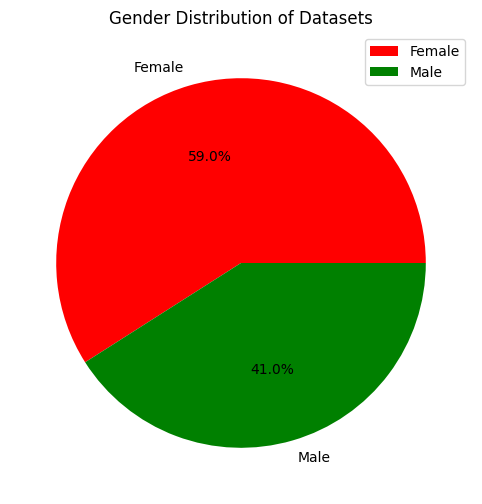

In [116]:
plt.figure(figsize = (10, 6))
plt.title("Gender Distribution of Datasets")
plt.pie(gender_df['count'],
        colors = ['red','green'],
        autopct = "%.1f%%",
        labels = gender_df['gender'])
plt.legend()
plt.show()

## smoking status

In [117]:
## write your code here
final_df['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [118]:
final_df.loc[final_df['smoking_status']== "Unknown"]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
9,60491,Female,78.0,1.98120,94.988713,58.57,24.2,Unknown,0,0,Yes,Private,Urban,1
23,64778,Male,82.0,1.55448,78.533262,169.35,32.5,Unknown,0,1,Yes,Private,Rural,1
31,33879,Male,42.0,1.95072,96.654836,83.41,25.4,Unknown,0,0,Yes,Private,Rural,1
38,47306,Male,58.0,1.76784,100.008264,92.62,32.0,Unknown,0,0,No,Private,Rural,1
67,72366,Male,76.0,1.95072,77.247763,104.47,20.3,Unknown,0,0,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,1.82880,58.528915,71.88,17.5,Unknown,0,0,No,children,Urban,0
5101,36901,Female,45.0,1.55448,59.201998,97.95,24.5,Unknown,0,0,Yes,Private,Urban,0
5103,22127,Female,18.0,1.79832,151.672481,82.85,46.9,Unknown,0,0,No,Private,Urban,0
5104,14180,Female,13.0,1.92024,68.584183,103.08,18.6,Unknown,0,0,No,children,Rural,0


In [120]:
final_df.loc[(final_df['smoking_status'] == "Unknown")
& (final_df['age'] < 18)]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
245,49669,Female,14.00,1.64592,83.709727,57.93,30.9,Unknown,0,0,No,children,Rural,1
249,30669,Male,3.00,1.64592,48.762948,95.12,18.0,Unknown,0,0,No,children,Rural,0
251,16523,Female,8.00,1.79832,56.917605,110.89,17.6,Unknown,0,0,No,Private,Urban,0
253,46136,Male,14.00,1.55448,46.153394,161.28,19.1,Unknown,0,0,No,Never_worked,Rural,0
282,33759,Female,3.00,1.55448,38.662529,73.74,16.0,Unknown,0,0,No,children,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,1.82880,56.187759,62.13,16.8,Unknown,0,0,No,children,Rural,0
5094,28048,Male,13.00,1.79832,78.585102,82.38,24.3,Unknown,0,0,No,children,Urban,0
5095,68598,Male,1.08,1.82880,58.194464,79.15,17.4,Unknown,0,0,No,children,Rural,0
5098,579,Male,9.00,1.82880,58.528915,71.88,17.5,Unknown,0,0,No,children,Urban,0


In [126]:
final_df.loc[final_df['age']< 10, 'smoking_status'].value_counts()

smoking_status
Unknown    459
Name: count, dtype: int64

In [127]:
final_df.loc[final_df['age']< 10, 'smoking_status'] = "never smoked"

In [128]:
final_df['smoking_status'].value_counts()

smoking_status
never smoked       2311
Unknown            1024
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [129]:
smoking_status_df = final_df['smoking_status'].value_counts().reset_index()
smoking_status_df

,smoking_status,count
0,never smoked,2311
1,Unknown,1024
2,formerly smoked,836
3,smokes,737


<ipython-input-133-52f4d1f52e03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = smoking_status_df,


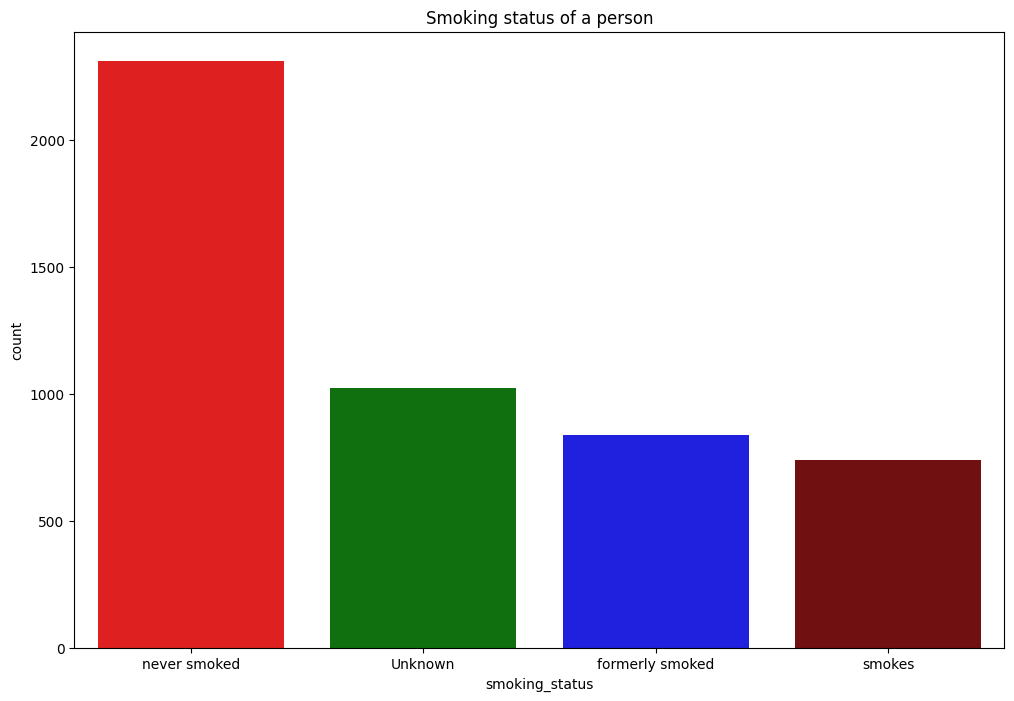

In [133]:
plt.figure(figsize = (12, 8))
sns.barplot(data = smoking_status_df,
            x = "smoking_status",
            y = "count",
            palette = ['red', 'green', 'blue', 'maroon'])
plt.title("Smoking status of a person")
plt.show()

## hypertension

In [135]:
hypertension_df = final_df['hypertension'].value_counts().reset_index()
hypertension_df

,hypertension,count
0,0,4457
1,1,451


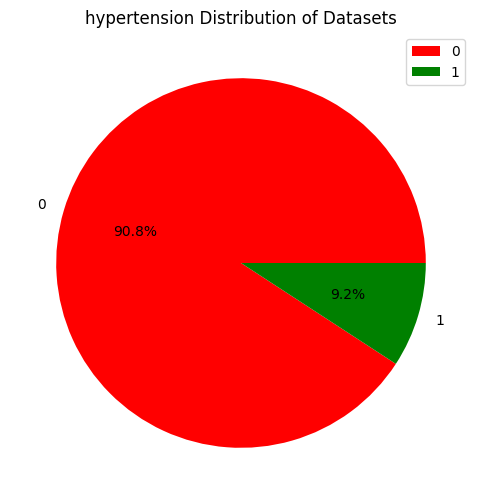

In [136]:
plt.figure(figsize = (10, 6))
plt.title("hypertension Distribution of Datasets")
plt.pie(hypertension_df['count'],
        colors = ['red','green'],
        autopct = "%.1f%%",
        labels = hypertension_df['hypertension'])
plt.legend()
plt.show()

## stroke feature

In [138]:
stroke_df = final_df['stroke'].value_counts().reset_index()
stroke_df

,stroke,count
0,0,4699
1,1,209


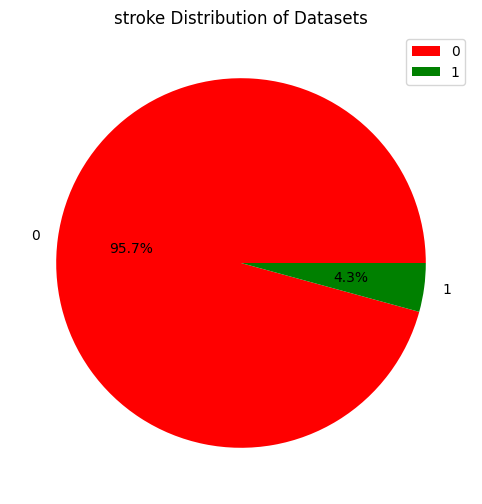

In [139]:
plt.figure(figsize = (10, 6))
plt.title("stroke Distribution of Datasets")
plt.pie(stroke_df['count'],
        colors = ['red','green'],
        autopct = "%.1f%%",
        labels = stroke_df['stroke'])
plt.legend()
plt.show()

## Is there a chance that patients with hypertension has more likely to get a stroke or not?

In [140]:
stroke_hypertension_df = pd.crosstab(final_df['stroke'], final_df['hypertension'])
stroke_hypertension_df

hypertension,0,1
stroke,,
0,4308,391
1,149,60


## Hypothesis Testing (Chisquare test for Independence)
- HO (Null Hypothesis): There is no relationship betweeen stroke and hypertension.
- H1 (Alternative Hypothesis): There is a strong relationship between stroke and hypertension

- Observe p value, if pvalue > 0.05, accept H0 else reject H0

In [141]:
from scipy.stats import chi2_contingency

In [142]:
# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(stroke_hypertension_df)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 97.23918231192063
p-value: 6.143875464115642e-23
Degrees of freedom: 1
Expected frequencies:
[[4267.20517522  431.79482478]
 [ 189.79482478   19.20517522]]


## Group Barplot

In [144]:
stock_hypertension_df_long = final_df[['stroke', 'hypertension']].value_counts().reset_index()
stock_hypertension_df_long

,stroke,hypertension,count
0,0,0,4308
1,0,1,391
2,1,0,149
3,1,1,60


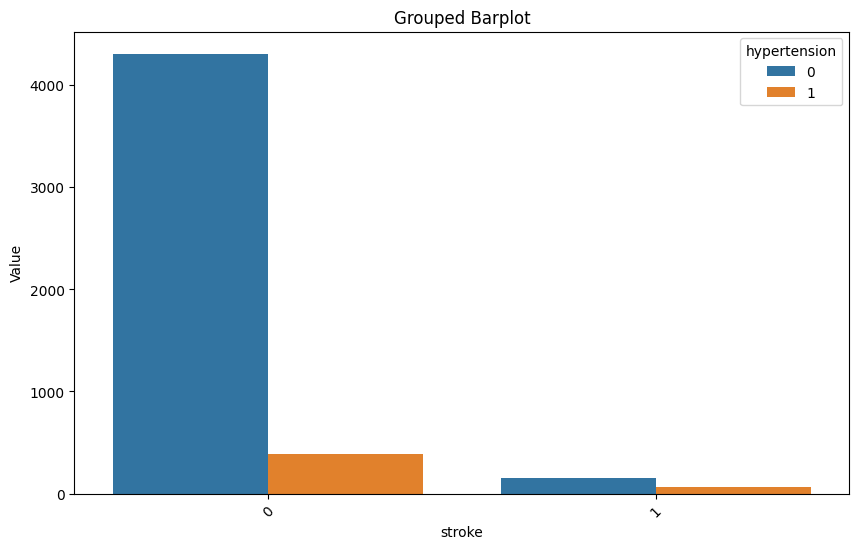

In [145]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=stock_hypertension_df_long, x='stroke', y='count', hue='hypertension')
plt.title('Grouped Barplot')
plt.xlabel('stroke')
plt.ylabel('Value')
plt.xticks(rotation = 45)
plt.show()


## heart disease

In [146]:
final_df['heart_disease'].value_counts()

heart_disease
0    4665
1     243
Name: count, dtype: int64

In [147]:
stroke_heart_disease_df = pd.crosstab(final_df['stroke'], final_df['heart_disease'])
stroke_heart_disease_df

heart_disease,0,1
stroke,,
0,4496,203
1,169,40


## Hypothesis Testing (Chisquare test for Independence)
- HO (Null Hypothesis): There is no relationship betweeen stroke and heart disease.
- H1 (Alternative Hypothesis): There is a strong relationship between stroke and heartdisease

- Observe p value, if pvalue > 0.05, accept H0 else reject H0

In [148]:
# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(stroke_heart_disease_df)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 90.24989255123297
p-value: 2.0990170036138994e-21
Degrees of freedom: 1
Expected frequencies:
[[4466.34779951  232.65220049]
 [ 198.65220049   10.34779951]]


## Group Bar plot

In [149]:
stroke_heart_disease_long_df = final_df[['stroke', 'heart_disease']].value_counts().reset_index()
stroke_heart_disease_long_df

,stroke,heart_disease,count
0,0,0,4496
1,0,1,203
2,1,0,169
3,1,1,40


<Axes: xlabel='heart_disease', ylabel='count'>

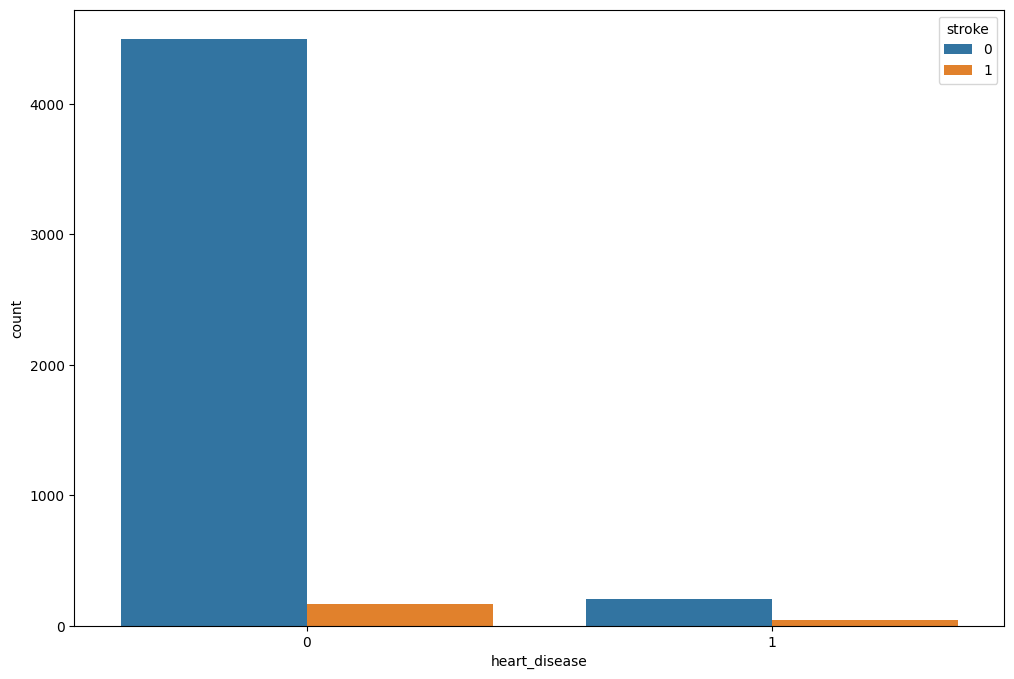

In [154]:
plt.figure(figsize = (12, 8))
sns.barplot(data = stroke_heart_disease_long_df,
                x = 'heart_disease',
                y = 'count',
                hue = 'stroke',
                orient = 'vertical')

## Numerical Features

In [161]:
final_df.select_dtypes('number')

,id,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,9046,67.0,1.82880,122.409046,169.35,36.6,0,1,1
2,31112,80.0,1.79832,105.103532,105.92,32.5,0,1,1
3,60182,49.0,1.92024,126.843865,169.35,34.4,0,0,1
4,1665,79.0,1.85928,82.966131,169.35,24.0,1,0,1
5,56669,81.0,1.79832,93.784690,169.35,29.0,0,0,1
...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,1.92024,68.584183,103.08,18.6,0,0,0
5106,44873,81.0,1.88976,142.847714,125.20,40.0,0,0,0
5107,19723,35.0,1.82880,102.341989,82.99,30.6,0,0,0
5108,37544,51.0,1.82880,85.619442,166.29,25.6,0,0,0


## age column

<Axes: xlabel='age', ylabel='Count'>

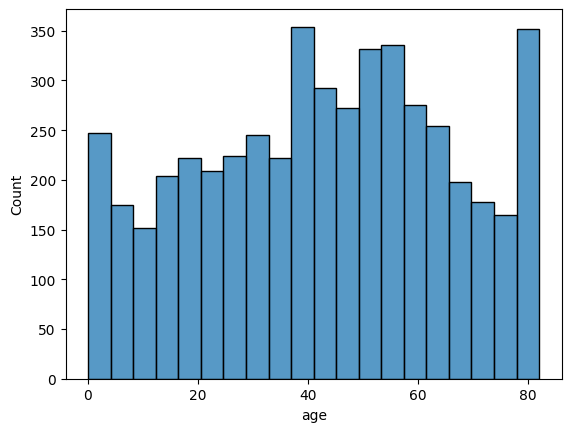

In [162]:
sns.histplot(final_df['age'])

<Axes: xlabel='age', ylabel='Density'>

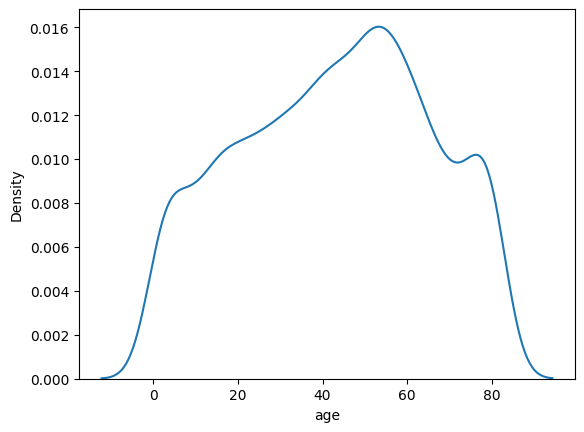

In [163]:
sns.kdeplot(final_df['age'])

In [170]:
final_df['age'].describe()

count    4908.000000
mean       42.868810
std        22.556128
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

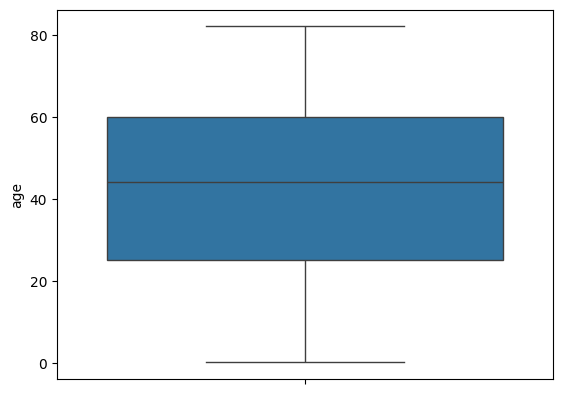

In [164]:
sns.boxplot(final_df['age'])

## Bmi column

<Axes: xlabel='bmi', ylabel='Count'>

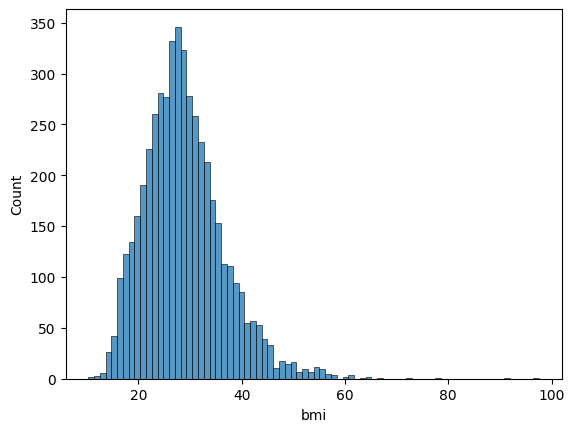

In [165]:
sns.histplot(final_df['bmi'])

<Axes: xlabel='bmi', ylabel='Density'>

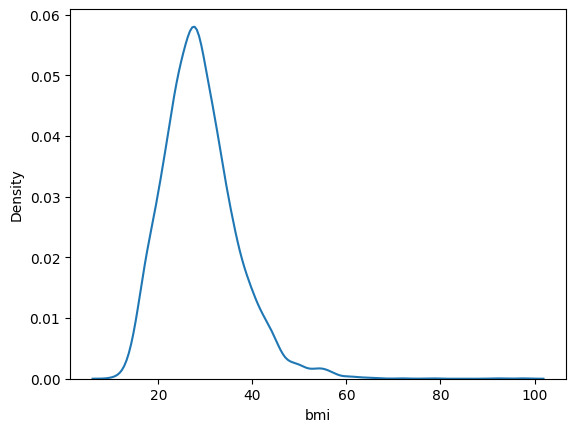

In [168]:
sns.kdeplot(final_df['bmi'])

In [169]:
final_df['bmi'].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

<Axes: ylabel='bmi'>

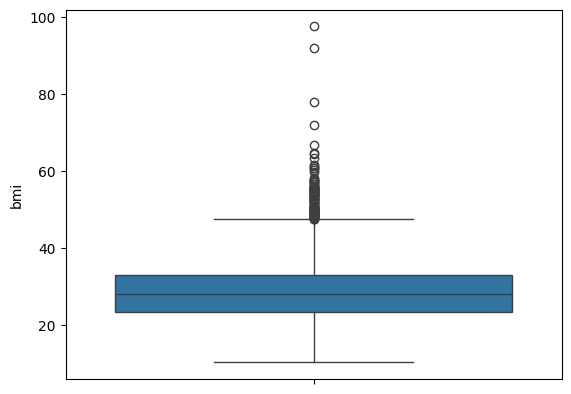

In [171]:
sns.boxplot(final_df['bmi'])

### Hypothesis Test For Normality


# Perform Kolmogorov-Smirnov test
statistic, pvalue = kstest(final_df['bmi'], 'norm')

# Print the result
print("Kolmogorov-Smirnov Test Statistic:", statistic)

print("p-value:", pvalue)

# Interpret the results
alpha = 0.05  # Significance level

if pvalue > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
    
else:
    print("Sample does not look Gaussian (reject H0)")


In [183]:
from scipy.stats import kstest, shapiro

## Scatterplots

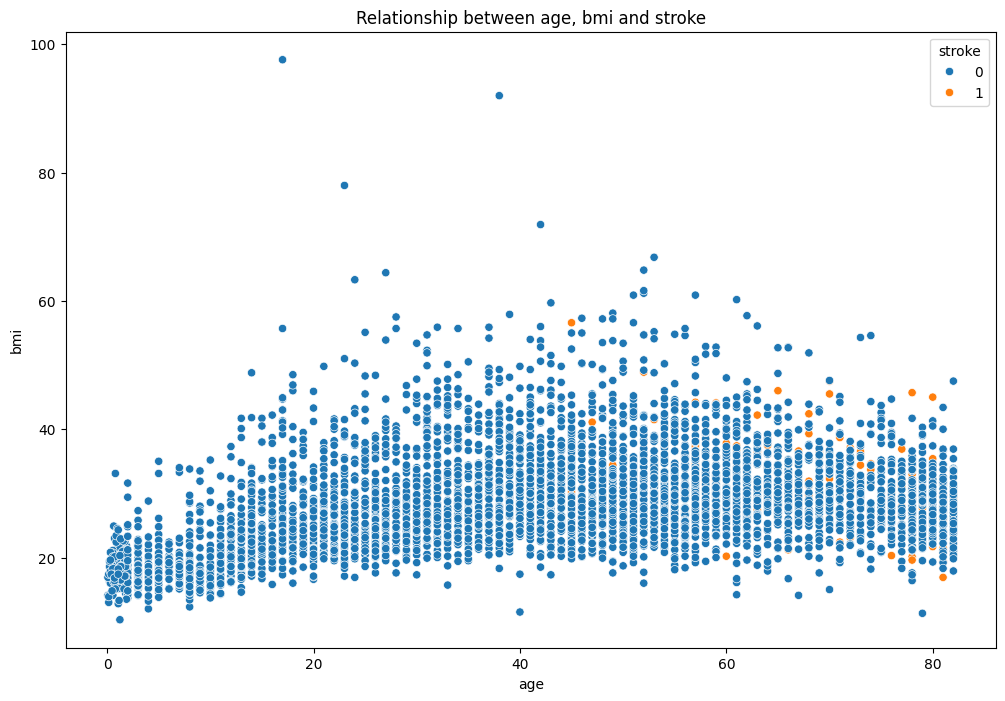

In [173]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = final_df, x = "age", y = "bmi",
            hue = "stroke")
plt.title("Relationship between age, bmi and stroke")
plt.show()

<Axes: >

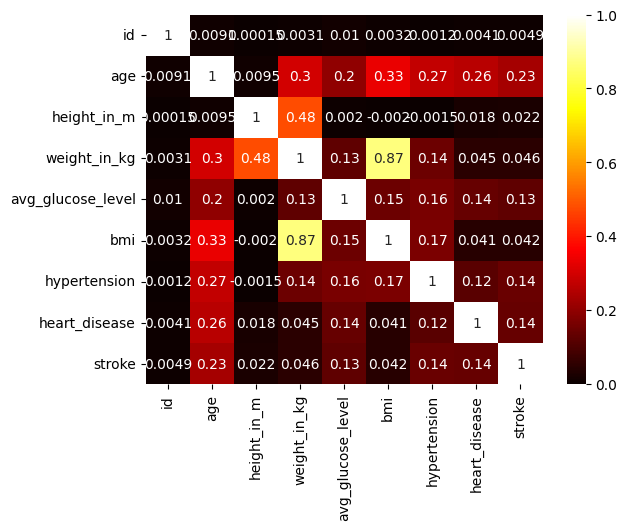

In [176]:
sns.heatmap(final_df.select_dtypes('number').corr(), cmap = 'hot',
            annot = True)

In [177]:
final_df

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,Female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1
5,56669,Male,81.0,1.79832,93.784690,169.35,29.0,formerly smoked,0,0,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,1.92024,68.584183,103.08,18.6,Unknown,0,0,No,children,Rural,0
5106,44873,Female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5107,19723,Female,35.0,1.82880,102.341989,82.99,30.6,never smoked,0,0,Yes,Self-employed,Rural,0
5108,37544,Male,51.0,1.82880,85.619442,166.29,25.6,formerly smoked,0,0,Yes,Private,Rural,0
